In [2]:
%pwd

'/Users/jvh/Desktop/Porsche Challenge/hpi-porsche-challenge'

In [3]:
import numpy as np
from darts import TimeSeries
import pandas as pd

from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, ExponentialSmoothing, BlockRNNModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
import darts.utils.timeseries_generation as tg
from darts.datasets import AirPassengersDataset, EnergyDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.missing_values import fill_missing_values
from darts.utils.likelihood_models import GaussianLikelihood
from darts.models import NaiveSeasonal
from darts.metrics import rmse
from darts.models import *

import warnings

warnings.filterwarnings("ignore")
import logging

import matplotlib.pyplot as plt

/Users/jvh/Desktop/Porsche Challenge/hpi-porsche-challenge/.venv/lib/python3.11/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [6]:
data = pd.read_parquet("time-series-model/data/processed/energy_data_processed.parquet")
data.set_index("timestamp", inplace=True)
data = data[data.columns].astype(float)
series = TimeSeries.from_dataframe(data, fill_missing_dates=True, fillna_value=0)

#series = Scaler().fit_transform(series)

test_split = 0.15
val_split=0.15
train_end_index = (1 - val_split - test_split) * len(series)
val_end_index = (1 - test_split) * len(series)
train_end_index, val_end_index = int(train_end_index), int(val_end_index)

print(train_end_index, val_end_index)

train, val, test = series[:train_end_index], series[train_end_index:val_end_index], series[val_end_index:]

50585 61425


Number of components is larger than 10 (12). Plotting only the first 10 components.You can overwrite this in the using the `plot_all_components` argument in plot()Beware that plotting a large number of components may cause performance issues.


model NaiveSeasonal() obtains RMSE: 4046.56


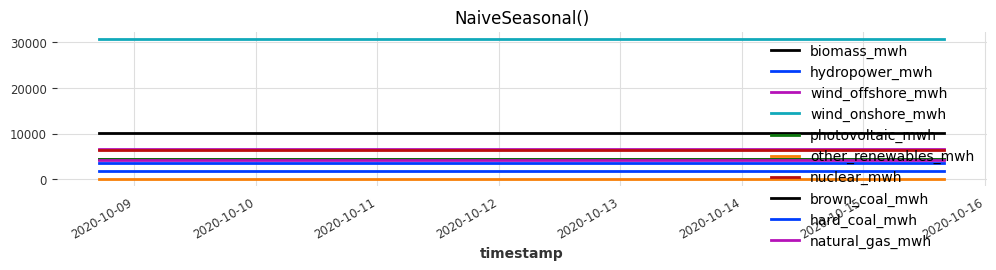

Number of components is larger than 10 (12). Plotting only the first 10 components.You can overwrite this in the using the `plot_all_components` argument in plot()Beware that plotting a large number of components may cause performance issues.


model NaiveSeasonal(K=7) obtains RMSE: 3883.77


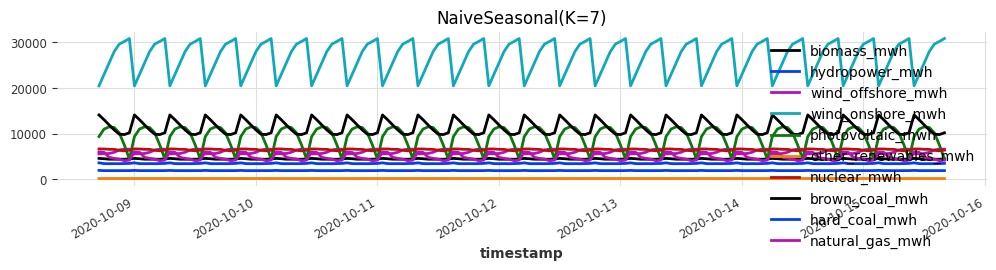

Number of components is larger than 10 (12). Plotting only the first 10 components.You can overwrite this in the using the `plot_all_components` argument in plot()Beware that plotting a large number of components may cause performance issues.


model NaiveSeasonal(K=24) obtains RMSE: 3098.21


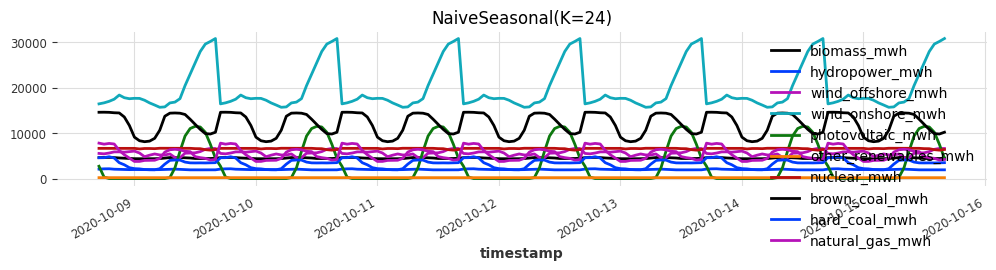

Number of components is larger than 10 (12). Plotting only the first 10 components.You can overwrite this in the using the `plot_all_components` argument in plot()Beware that plotting a large number of components may cause performance issues.


model NaiveSeasonal(K=168) obtains RMSE: 3008.07


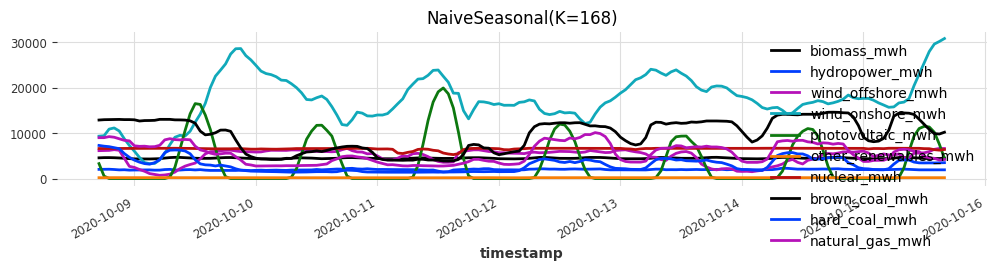

In [13]:
def eval_model(model):
        
    model.fit(series=train)
    forecast = model.predict(len(test))  # TODO: It seems like the model does not predict starting from the test start date here 
    
    test_rmse = rmse(series, forecast)
    print(f"model {model} obtains RMSE: {test_rmse:.2f}")
    
    plt.figure(figsize=(12, 2))
    forecast[:7*24].plot()
    plt.title(str(model))
    plt.show()
    
# Multivariate models
eval_model(NaiveSeasonal(K=1))
eval_model(NaiveSeasonal(K=7))
eval_model(NaiveSeasonal(K=24))
eval_model(NaiveSeasonal(K=168))